# 1. Importing/Installing Packages

In [1]:
# basic
from glob import glob
import pandas as pd
import numpy as np
from itertools import zip_longest

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# # increasing the display domain of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## 1.1 Loading Raw Data

In [3]:
path = 'data/raw/*.csv'
path_crash_data = [p for p in glob(path)]
path_crash_data

['data/raw\\bike_typing.csv',
 'data/raw\\driver.csv',
 'data/raw\\event.csv',
 'data/raw\\non_motorist.csv',
 'data/raw\\passenger.csv',
 'data/raw\\ped_typing.csv',
 'data/raw\\vehicle.csv',
 'data/raw\\violation.csv']

In [4]:
df_driver_data = pd.read_csv(path_crash_data[1])
df_event_data = pd.read_csv(path_crash_data[2])
df_pedestrian_data = pd.read_csv(path_crash_data[3])
df_vehicle_data = pd.read_csv(path_crash_data[6], low_memory=False)

# 2. Data Preprocessing

## 2.1 Exploratory Data Analysis

## 2.2 Data Cleaning

In [5]:
# df_pedestrian_data.head()

# df_pedestrian_data.NON_MOTORIST_DESCRIPTION_CODE.value_counts()
df_pedestrian_data = df_pedestrian_data[(df_pedestrian_data.NON_MOTORIST_DESCRIPTION_CODE == 'Pedestrian') | (df_pedestrian_data.NON_MOTORIST_DESCRIPTION_CODE == 'Other Pedestrian')].reset_index(drop=True)
# df_pedestrian_data.head()

# df_pedestrian_data.INJURY_SEVERITY.value_counts()
# df_pedestrian_data.loc[0, 'INJURY_SEVERITY'] == 'None'
df_pedestrian_data = df_pedestrian_data[df_pedestrian_data.INJURY_SEVERITY != 'Non-Traffic Fatality'].reset_index(drop=True)
# df_pedestrian_data.INJURY_SEVERITY.value_counts()

list_report_number_pedestrian = list(df_pedestrian_data.REPORT_NUMBER.unique())
# df_pedestrian_data.shape

In [6]:
# df_event_data.head()

# df_event_data.S4_CRASH_TYPE.value_counts()
# df_event_data.S4_PEDESTRIAN_FATALITY_COUNT.value_counts()

# df_event_data.S4_IS_PEDESTRIAN_INVOLVED.value_counts()
df_event_data = df_event_data[df_event_data.REPORT_NUMBER.isin(list_report_number_pedestrian)].reset_index(drop=True)
# df_event_data.S4_IS_PEDESTRIAN_INVOLVED.value_counts()
# len(list_report_number_pedestrian)

# df_event_data.TOTAL_NUMBER_OF_VEHICLES.value_counts()
df_event_data = df_event_data[df_event_data.TOTAL_NUMBER_OF_VEHICLES == 1].reset_index(drop=True)
list_report_number_event_SV = list(df_event_data.REPORT_NUMBER.unique()) # SV: Single Vehicle
# len(list_report_number_event_SV)
# set(list_report_number_event_SV).issubset(set(list_report_number_pedestrian))

In [7]:
# df_driver_data.head(100)
# df_driver_data.shape
# df_driver_data.columns.values

df_driver_data = df_driver_data[df_driver_data.REPORT_NUMBER.isin(list_report_number_event_SV)].reset_index(drop=True)
# df_driver_data.shape

# df_driver_data.REPORT_NUMBER.value_counts()
# list_report_number_driver = list(df_driver_data.REPORT_NUMBER.unique())

In [8]:
# df_vehicle_data.head()
# df_vehicle_data.shape

df_vehicle_data = df_vehicle_data[df_vehicle_data.REPORT_NUMBER.isin(list_report_number_event_SV)].reset_index(drop=True)

# df_vehicle_data.REPORT_NUMBER.value_counts()

In [9]:
df_crash_data = pd.DataFrame()

for report_no in list_report_number_event_SV:
    
    dict_crash_data = {'report_number': [], 'crash_year': [], 
                       'pedestrian_gender': [], 'injury_severity': [], 'pedestrian_age': [], 'pedestrian_alcohol_use': [], 'pedestrian_drug_use': [], 'pedestrian_action_prior_crash': [],
                       'driver_age': [], 'driver_gender': [], 'vision_obstruction': [], 'driver_alcohol_use': [], 'driver_drug_use': [], 'speeding': [], 
                       'vehicle_year': [], 'type_of_vehicle': [], 'estimated_speed': [], 'posted_speed': [], 'traffic_code': [], 'road_alignment': [], 'vehicle_maneuver': [], 'traffic_control': [],
                       'pedestrian_count': [], 'crash_date_time': [], 'rural_urban': [], 'road_type': [], 'light_condition': [], 'weather_condition': [], 'road_surface_condition': [], 'junction_flag': []}
    
    df_pedestrian_data_TEMP = df_pedestrian_data[df_pedestrian_data.REPORT_NUMBER == report_no].reset_index(drop=True)
    df_driver_data_TEMP = df_driver_data[df_driver_data.REPORT_NUMBER == report_no].reset_index(drop=True)
    df_vehicle_data_TEMP = df_vehicle_data[df_vehicle_data.REPORT_NUMBER == report_no].reset_index(drop=True)
    df_event_data_TEMP = df_event_data[df_event_data.REPORT_NUMBER == report_no].reset_index(drop=True)
    
    for i in range(df_pedestrian_data_TEMP.shape[0]):
        
        # from pedestrian data
        dict_crash_data['report_number'].append(report_no)
        dict_crash_data['crash_year'].append(df_pedestrian_data_TEMP.loc[i, 'CRASH_YEAR'])
        dict_crash_data['injury_severity'].append(df_pedestrian_data_TEMP.loc[i, 'INJURY_SEVERITY'])
        dict_crash_data['pedestrian_gender'].append(df_pedestrian_data_TEMP.loc[i, 'SEX'])
        dict_crash_data['pedestrian_age'].append(df_pedestrian_data_TEMP.loc[i, 'S4_AGE_AT_TIME_OF_CRASH'])
        dict_crash_data['pedestrian_alcohol_use'].append(df_pedestrian_data_TEMP.loc[0, 'SUSPECTED_ALCOHOL_USE_CODE'])
        dict_crash_data['pedestrian_drug_use'].append(df_pedestrian_data_TEMP.loc[0, 'SUSPECTED_DRUG_USE_CODE'])
        dict_crash_data['pedestrian_action_prior_crash'].append(df_pedestrian_data_TEMP.loc[i, 'ACTION_PRIOR_TO_CRASH_CODE'])
        
        # from driver data
        if df_driver_data_TEMP.empty == False:            
            dict_crash_data['driver_age'].append(df_driver_data_TEMP.loc[0, 'S4_AGE_AT_TIME_OF_CRASH'])
            dict_crash_data['driver_gender'].append(df_driver_data_TEMP.loc[0, 'SEX'])
            dict_crash_data['vision_obstruction'].append(df_driver_data_TEMP.loc[0, 'VISION_OBSTRUCTED'])
            dict_crash_data['speeding'].append(df_driver_data_TEMP.loc[0, 'S4_IS_SPEEDING_RELATED'])
            dict_crash_data['driver_alcohol_use'].append(df_driver_data_TEMP.loc[0, 'SUSPECTED_ALCOHOL_USE_CODE'])
            dict_crash_data['driver_drug_use'].append(df_driver_data_TEMP.loc[0, 'SUSPECTED_DRUG_USE_CODE'])
        else:
            pass
        
        # from vehicle data
        if df_vehicle_data_TEMP.empty == False:
            dict_crash_data['vehicle_year'].append(df_vehicle_data_TEMP.loc[0, 'VEHICLE_YEAR'])
            dict_crash_data['type_of_vehicle'].append(df_vehicle_data_TEMP.loc[0, 'TYPE_OF_VEHICLE'])
            dict_crash_data['estimated_speed'].append(df_vehicle_data_TEMP.loc[0, 'ESTIMATED_MPH'])
            dict_crash_data['posted_speed'].append(df_vehicle_data_TEMP.loc[0, 'POSTED_SPEED'])
            dict_crash_data['traffic_code'].append(df_vehicle_data_TEMP.loc[0, 'TRAFFICWAY_CODE'])
            dict_crash_data['road_alignment'].append(df_vehicle_data_TEMP.loc[0, 'ROADWAY_ALIGNMENT_CODE'])
            dict_crash_data['vehicle_maneuver'].append(df_vehicle_data_TEMP.loc[0, 'VEHICLE_MANEUVER_ACTION'])
            dict_crash_data['traffic_control'].append(df_vehicle_data_TEMP.loc[0, 'TRAFFIC_CONTROL_DEVICE'])
        else:
            pass
        
        # from event data
        if df_event_data_TEMP.empty == False:
            dict_crash_data['pedestrian_count'].append(df_event_data_TEMP.loc[0, 'S4_PEDESTRIAN_COUNT'])
            dict_crash_data['crash_date_time'].append(df_event_data_TEMP.loc[0, 'CRASH_DATE_AND_TIME'])
            dict_crash_data['rural_urban'].append(df_event_data_TEMP.loc[0, 'RURAL_OR_URBAN'])
            dict_crash_data['road_type'].append(df_event_data_TEMP.loc[0, 'ROAD_SYSTEM_IDENTIFER'])
            dict_crash_data['light_condition'].append(df_event_data_TEMP.loc[0, 'LIGHT_CONDITION'])
            dict_crash_data['weather_condition'].append(df_event_data_TEMP.loc[0, 'WEATHER_CONDITION'])
            dict_crash_data['road_surface_condition'].append(df_event_data_TEMP.loc[0, 'ROAD_SURFACE_CONDITION'])
            dict_crash_data['junction_flag'].append(df_event_data_TEMP.loc[0, 'JUNCTION_FLAG'])
        else:
            pass
        
    df_dict_crash_data = pd.DataFrame(zip_longest(*dict_crash_data.values(), fillvalue=np.nan), columns=dict_crash_data)
    df_crash_data = pd.concat([df_crash_data, df_dict_crash_data])


In [10]:
df_crash_data.shape

(10357, 30)

In [11]:
# plt.figure(figsize=(14,8))
# sns.set_style('darkgrid')

# sns.histplot(data=df_crash_data, x='time', bins=24)

# plt.xlabel('Time', fontsize=15)
# plt.ylabel('Crash Frequency',fontsize=15)

# plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\TTE6667_Discrete Choice Modeling\Projects\Final Project\Presentation\Images\dist_crash_time.png', dpi=600, bbox_inches='tight')
# plt.show()

In [12]:
# df_crash_data.head()
# len(df_crash_data.report_number.unique())
# df_crash_data.shape

# df_crash_data.pedestrian_count.value_counts()
df_crash_data = df_crash_data[df_crash_data.pedestrian_count == 1].reset_index(drop=True)

In [13]:
df_crash_data.groupby(['crash_year'])['injury_severity'].value_counts()

crash_year  injury_severity       
2016        Non-Incapacitating        495
            Possible                  415
            Incapacitating            301
            None                      168
            Fatal (within 30 days)    119
2017        Non-Incapacitating        586
            Possible                  457
            Incapacitating            263
            None                      181
            Fatal (within 30 days)    140
2018        Non-Incapacitating        564
            Possible                  428
            Incapacitating            255
            None                      198
            Fatal (within 30 days)    111
2019        Non-Incapacitating        574
            Possible                  422
            Incapacitating            275
            None                      235
            Fatal (within 30 days)    138
2020        Non-Incapacitating        482
            Possible                  344
            Incapacitating            224

In [14]:
df_crash_data.injury_severity.value_counts()

Non-Incapacitating        3258
Possible                  2454
Incapacitating            1587
None                      1220
Fatal (within 30 days)     764
Name: injury_severity, dtype: int64

In [15]:
df_crash_data.shape

(9338, 30)

## 2.3 Data Wrangling

In [16]:
df_crash_data = df_crash_data.reset_index(drop=True)

In [17]:
##### response variable #####

## pedestrian crash injury severity
# df_crash_data.injury_severity.value_counts()
df_crash_data['injury_severity'] = df_crash_data['injury_severity'].map({'Fatal (within 30 days)': 'Fatal_Injury', 'Incapacitating': 'Incapacitating_Injury',
                                                                         'Non-Incapacitating': 'Non-Incapacitating_Injury', 
                                                                         'Possible': 'No/Possible_Injury', 'None': 'No/Possible_Injury'})

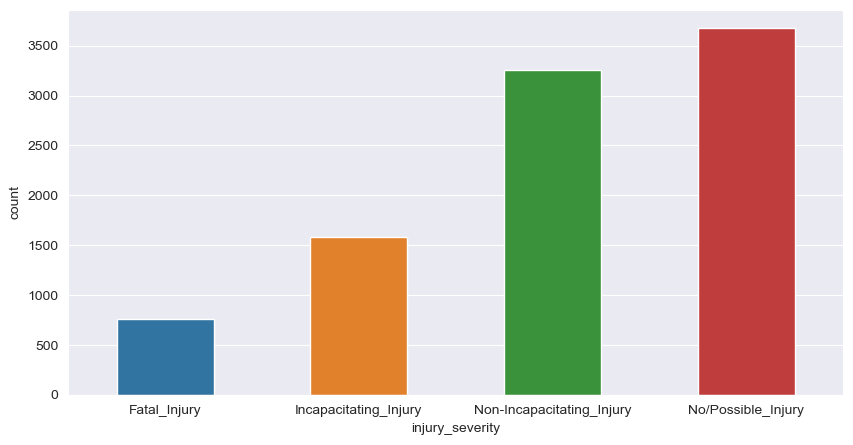

In [18]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

sns.countplot(x='injury_severity',data=df_crash_data, width=0.5)

# plt.xlabel('Injury Severity', fontsize=15)
# plt.ylabel('Frequency',fontsize=15)

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\TTE6667_Discrete Choice Modeling\Projects\Final Project\Presentation\Images\dist_injury_severity.jpg', dpi=250, bbox_inches='tight')
plt.show()

In [19]:
##### crash characteristics #####

## crash location
# df_crash_data.junction_flag.value_counts()
df_crash_data.rename(columns={'junction_flag': 'crash_location'}, inplace=True)
df_crash_data['crash_location'] = df_crash_data['crash_location'].map({'Non-Junction': 'Not At Intersection', 
                                                                       'Intersection': 'At Intersection', 'Intersection-Related': 'At Intersection'})

## traffic control
# df_crash_data.traffic_control.value_counts()
df_crash_data['traffic_control'] = df_crash_data['traffic_control'].map({'No Controls': 'Uncontrolled', 'Traffic Control Signal': 'Signalized Control',
                                                                         'Stop Sign': 'Stop/Warning/Yield Sign', 'Warning Sign': 'Stop/Warning/Yield Sign', 'Yield Sign': 'Stop/Warning/Yield Sign'})

## area type
# df_crash_data.rural_urban.value_counts()
df_crash_data.rename(columns={'rural_urban': 'area type'}, inplace=True)

## road class
# df_crash_data.road_type.value_counts()
df_crash_data.rename(columns={'road_type': 'road_class'}, inplace=True)
df_crash_data['road_class'] = df_crash_data['road_class'].map({'Local': 'Local Road', 'Parking Lot': 'Parking Lot', 'State': 'State Road', 'County': 'County Road',
                                                               'U.S.': 'US Road', 'Private Roadway': 'Private Road', 'Interstate': 'Interstate', 'Turnpike/Toll': 'Turnpike/Toll'})


##### temporal characteristics #####

# df_crash_data.dtypes
df_crash_data['crash_date_time'] = pd.to_datetime(df_crash_data['crash_date_time'])
df_crash_data['month'] = df_crash_data.crash_date_time.dt.month 
df_crash_data['day'] = df_crash_data.crash_date_time.dt.day_of_week
df_crash_data['time'] = df_crash_data.crash_date_time.dt.hour

## season
# df_crash_data.month.value_counts()
df_crash_data.rename(columns={'month': 'season'}, inplace=True)
df_crash_data['season'] = df_crash_data['season'].map({12: 'Winter', 1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                                                       6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

# day of week
# df_crash_data.day.value_counts()
df_crash_data.rename(columns={'day': 'day_of_week'}, inplace=True)
df_crash_data['day_of_week'] = np.where((df_crash_data['day_of_week'] == 5) | (df_crash_data['day_of_week'] == 6) , 'weekend', 'weekday') # 0: Monday, ......, 5: Saturday, 6: Sunday

## crash time
# df_crash_data.time.value_counts()
crash_time_cutoff = [-1, 6, 9, 15, 19, 23] # (-1, 6] --> '-1' exclusive and '6' inclusive
                                           # 'Morning_Off-Peak': ['00:00:00', '06:59:00'], ''Morning_Off-Peak': ['07:00:00', '09:59:00'], 'Day_Off-Peak': ['10:00:00', '15:59:00'], 'Afternoon_Peak': ['16:00:00', '18:59:00'], 'Night_Off-Peak': ['19:00:00', '23:59:00']
crash_time_labels = ['Morning Off-Peak','Morning Peak', 'Day Off-Peak', 'Afternoon Peak', 'Night Off-Peak']
df_crash_data.rename(columns={'time': 'crash_time'}, inplace=True)
df_crash_data['crash_time'] = pd.cut(df_crash_data['crash_time'], bins=crash_time_cutoff, labels=crash_time_labels)


##### environment characteristics #####

## light condition
# df_crash_data.light_condition.value_counts()
df_crash_data['light_condition'] = df_crash_data['light_condition'].map({'Daylight': 'Daylight', 'Dawn': 'Dawn', 'Dusk': 'Dusk',
                                                                         'Dark - Lighted': 'Dark-Lighted', 'Dark - Not Lighted': 'Dark-Not Lighted', 'Dark - Unknown Lighting': 'Dark-Lighted'})

## weather condition
# df_crash_data.weather_condition.value_counts()
df_crash_data['weather_condition'] = df_crash_data['weather_condition'].map({'Clear': 'Clear', 'Cloudy': 'Cloudy', 'Rain': 'Rain', 'Fog, Smog, Smoke': 'Smoky/Foggy'})
                                                                        

##### road geometry #####

## road alignment 
# df_crash_data.road_alignment.value_counts()
df_crash_data['road_alignment'] = df_crash_data['road_alignment'].map({'Straight': 'Straight', 'Curve Left': 'Curve', 'Curve Right': 'Curve'})

## road surface condition
# df_crash_data.road_surface_condition.value_counts()
df_crash_data['road_surface_condition'] = df_crash_data['road_surface_condition'].map({'Dry': 'Dry', 'Wet': 'Wet'})

## speed limit
# df_crash_data.posted_speed.value_counts()
# df_crash_data.posted_speed.describe()
posted_speed_limit_cutoff = [0, 44, 100] # (44, 100] --> '44' exclusive and '100' inclusive
posted_speed_limit_labels = ['<45 mph','>=45 mph']
df_crash_data.rename(columns={'posted_speed': 'posted_speed_limit'}, inplace=True)
df_crash_data['posted_speed_limit'] = pd.cut(df_crash_data['posted_speed_limit'], bins=posted_speed_limit_cutoff, labels=posted_speed_limit_labels)


##### pedestrian characteristics #####

## pedestrian gender
# df_crash_data.pedestrian_gender.value_counts()
df_crash_data['pedestrian_gender'] = df_crash_data['pedestrian_gender'].map({'Male': 'Male', 'Female': 'Female'})

## pedestrian age
# df_crash_data.pedestrian_age.value_counts()
pedestrian_age_cutoff = [-1.0, 14.0, 19.0, 24.0, 64.0, 79.0, 125.0] # (14.0, 19.0] --> '14.0' exclusive and '19.0' inclusive
pedestrian_age_labels = ['Children (14 Year Old and Below)', 'Very Young (15-19 Year Old)','Young (20-24 Year Old)', 'Middle (25-64 Year Old)', 'Old (65-79 Year Old)', 'Very Old (80 Year Old and Above)']
df_crash_data['pedestrian_age'] = pd.cut(df_crash_data['pedestrian_age'], bins=pedestrian_age_cutoff, labels=pedestrian_age_labels)

## pedestrian sobriety condition
# df_crash_data.pedestrian_alcohol_use.value_counts()
# df_crash_data.pedestrian_drug_use.value_counts()
dict_pedestrian_sobriety_condition = {'pedestrian_sobriety_condition': []}
for i in range(df_crash_data.shape[0]):
    if (df_crash_data.pedestrian_alcohol_use[i] == 'Y') or (df_crash_data.pedestrian_drug_use[i] == 'Y'):
        dict_pedestrian_sobriety_condition['pedestrian_sobriety_condition'].append('Not Sober')
    else:
        dict_pedestrian_sobriety_condition['pedestrian_sobriety_condition'].append('Sober')
        
df_crash_data['pedestrian_sobriety_condition'] = pd.DataFrame(dict_pedestrian_sobriety_condition)


##### vehicle characteristics #####

## vehicle type
# df_crash_data.type_of_vehicle.value_counts()
df_crash_data.rename(columns={'type_of_vehicle': 'vehicle_type'}, inplace=True)
df_crash_data['vehicle_type'] = df_crash_data['vehicle_type'].map({'Passenger Car': 'Car', '(Sport) Utility Vehicle': 'SUV', 'Pickup': 'Pickup', 'Bus': 'Bus',
                                                                   'Passenger Van': 'Van', 'Cargo Van (10,000 lbs (4,536 kg) or less)': 'Van', 
                                                                   'Medium/Heavy Trucks (more than 10,000 lbs (4,536 kg))': 'Truck', 'Other Light Trucks (10,000 lbs (4,536 kg) or less)': 'Truck'})

## vehicle year
# df_crash_data.vehicle_year.value_counts()
df_crash_data['vehicle_year'] = df_crash_data.crash_year - df_crash_data.vehicle_year
vehicle_year_cutoff = [-1.0, 4.0, 10.0, 15.0, 100.0] # (4.0, 10.0] --> '4.0' exclusive and '10.0' inclusive
vehicle_year_labels = ['<5 Years','5-10 Years', '11-15 Years', '>15 Years']
df_crash_data['vehicle_year'] = pd.cut(df_crash_data['vehicle_year'], bins=vehicle_year_cutoff, labels=vehicle_year_labels)


##### driver characteristics #####

## driver gender
# df_crash_data.driver_gender.value_counts()
df_crash_data['driver_gender'] = df_crash_data['driver_gender'].map({'Male': 'Male', 'Female': 'Female'})

## driver age
# df_crash_data.driver_age.value_counts()
driver_age_cutoff = [14.0, 19.0, 24.0, 64.0, 79.0, 125.0] # (14.0, 19.0] --> '14.0' exclusive and '19.0' inclusive
driver_age_labels = ['Very Young (15-19 Year Old)','Young (20-24 Year Old)', 'Middle (25-64 Year Old)', 'Old (65-79 Year Old)', 'Very Old (80 Year Old and Above)']
df_crash_data['driver_age'] = pd.cut(df_crash_data['driver_age'], bins=driver_age_cutoff, labels=driver_age_labels)

## driver sobriety condition
# df_crash_data.driver_alcohol_use.value_counts()
# df_crash_data.driver_drug_use.value_counts()
dict_driver_sobriety_condition = {'driver_sobriety_condition': []}
for i in range(df_crash_data.shape[0]):
    if (df_crash_data.driver_alcohol_use[i] == 'Y') or (df_crash_data.driver_drug_use[i] == 'Y'):
        dict_driver_sobriety_condition['driver_sobriety_condition'].append('Not Sober')
    else:
        dict_driver_sobriety_condition['driver_sobriety_condition'].append('Sober')
        
df_crash_data['driver_sobriety_condition'] = pd.DataFrame(dict_driver_sobriety_condition)

In [20]:
df_crash_data.head()

,report_number,crash_year,pedestrian_gender,injury_severity,pedestrian_age,pedestrian_alcohol_use,pedestrian_drug_use,pedestrian_action_prior_crash,driver_age,driver_gender,vision_obstruction,driver_alcohol_use,driver_drug_use,speeding,vehicle_year,vehicle_type,estimated_speed,posted_speed_limit,traffic_code,road_alignment,vehicle_maneuver,traffic_control,pedestrian_count,crash_date_time,area type,road_class,light_condition,weather_condition,road_surface_condition,crash_location,season,day_of_week,crash_time,pedestrian_sobriety_condition,driver_sobriety_condition
0,85507663,2017,Male,Fatal_Injury,Middle (25-64 Year Old),NaN,NaN,Crossing Roadway,Young (20-24 Year Old),Female,Vision Not Obscured,N,N,N,<5 Years,Car,40.0,<45 mph,"Two-Way, Divided, Positive Median Barrier",Straight,Straight Ahead,Uncontrolled,1,2017-04-17 00:15:00,Rural,US Road,Dark-Lighted,Clear,Dry,Not At Intersection,Spring,weekday,Morning Off-Peak,Sober,Sober
1,85511494,2017,Male,Fatal_Injury,Middle (25-64 Year Old),Y,NaN,Crossing Roadway,Young (20-24 Year Old),Male,Vision Not Obscured,N,N,N,<5 Years,Car,30.0,>=45 mph,"Two-Way, Divided, Positive Median Barrier",Straight,Straight Ahead,Uncontrolled,1,2017-04-08 01:13:00,Rural,State Road,Dark-Lighted,Clear,Dry,At Intersection,Spring,weekend,Morning Off-Peak,Not Sober,Sober
2,85514419,2017,Female,Incapacitating_Injury,Middle (25-64 Year Old),N,N,Walking/Cycling Along Roadway With Traffic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,>=45 mph,"Two-Way, Not Divided",NaN,Straight Ahead,Uncontrolled,1,2017-04-26 22:00:00,Urban,Local Road,Dark-Not Lighted,Clear,Dry,Not At Intersection,Spring,weekday,Night Off-Peak,Sober,Sober
3,85519679,2017,Female,Incapacitating_Injury,Middle (25-64 Year Old),N,N,Crossing Roadway,Middle (25-64 Year Old),Male,Vision Not Obscured,N,N,N,5-10 Years,Truck,35.0,<45 mph,"Two-Way, Divided, Unprotected (painted >4 feet) Median",Straight,Turning Right,Signalized Control,1,2017-05-05 06:33:00,Rural,Local Road,Dark-Lighted,Rain,Wet,At Intersection,Spring,weekday,Morning Off-Peak,Sober,Sober
4,85520392,2017,Female,Fatal_Injury,Young (20-24 Year Old),NaN,NaN,Walking/Cycling Along Roadway With Traffic,Old (65-79 Year Old),Male,Vision Not Obscured,NaN,NaN,N,11-15 Years,NaN,35.0,<45 mph,"Two-Way, Divided, Unprotected (painted >4 feet) Median",Straight,Straight Ahead,NaN,1,2017-05-26 03:51:00,Rural,State Road,Dark-Not Lighted,Clear,Dry,Not At Intersection,Spring,weekday,Morning Off-Peak,Sober,Sober


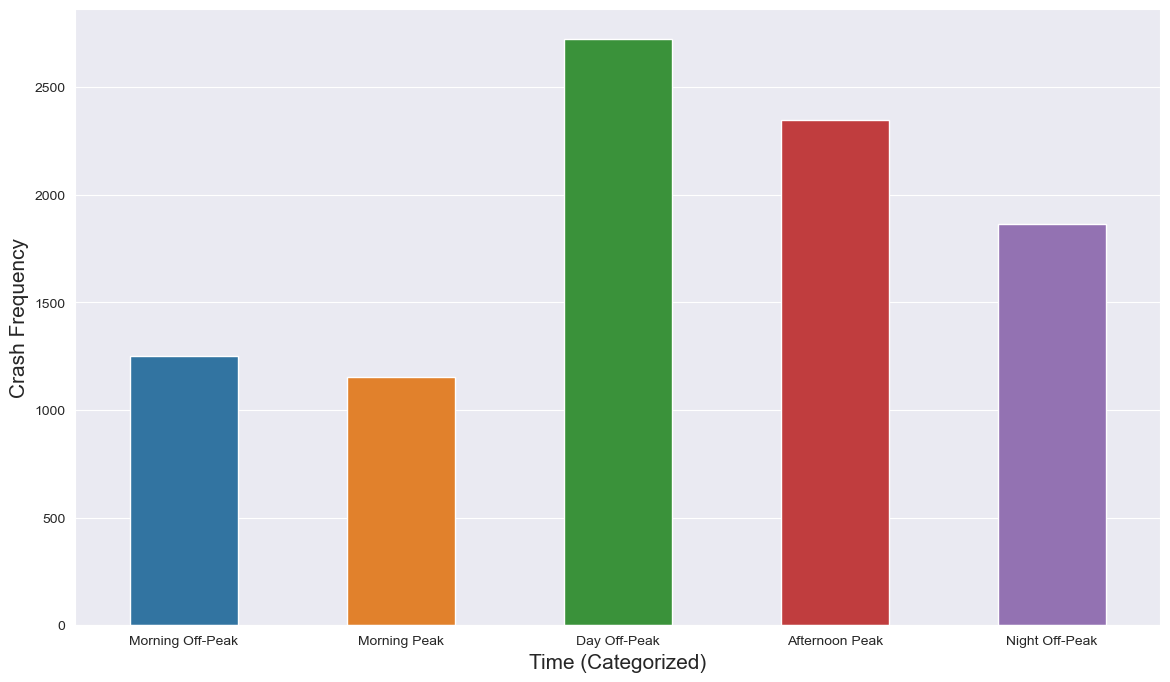

In [26]:
plt.figure(figsize=(14,8))
sns.set_style('darkgrid')

sns.countplot(x='crash_time',data=df_crash_data, width=0.5)

plt.xlabel('Time (Categorized)', fontsize=15)
plt.ylabel('Crash Frequency',fontsize=15)

plt.savefig(r'C:\Users\bm638305\OneDrive - Knights - University of Central Florida\UCF\Class\Fall 22\TTE6667_Discrete Choice Modeling\Projects\Final Project\Presentation\Images\dist_crash_time_cat.png', dpi=600, bbox_inches='tight')
plt.show()

In [22]:
df_crash_data.columns.values

array(['report_number', 'crash_year', 'pedestrian_gender',
       'injury_severity', 'pedestrian_age', 'pedestrian_alcohol_use',
       'pedestrian_drug_use', 'pedestrian_action_prior_crash',
       'driver_age', 'driver_gender', 'vision_obstruction',
       'driver_alcohol_use', 'driver_drug_use', 'speeding',
       'vehicle_year', 'vehicle_type', 'estimated_speed',
       'posted_speed_limit', 'traffic_code', 'road_alignment',
       'vehicle_maneuver', 'traffic_control', 'pedestrian_count',
       'crash_date_time', 'area type', 'road_class', 'light_condition',
       'weather_condition', 'road_surface_condition', 'crash_location',
       'season', 'day_of_week', 'crash_time',
       'pedestrian_sobriety_condition', 'driver_sobriety_condition'],
      dtype=object)

In [23]:
df_crash_data.drop(columns=['pedestrian_alcohol_use', 'pedestrian_drug_use', 'pedestrian_action_prior_crash', 
                            'vision_obstruction', 'driver_alcohol_use', 'driver_drug_use', 'speeding', 'estimated_speed', 'traffic_code', 
                            'vehicle_maneuver', 'pedestrian_count', 'crash_date_time'], inplace=True)

In [24]:
df_crash_data.head()

,report_number,crash_year,pedestrian_gender,injury_severity,pedestrian_age,driver_age,driver_gender,vehicle_year,vehicle_type,posted_speed_limit,road_alignment,traffic_control,area type,road_class,light_condition,weather_condition,road_surface_condition,crash_location,season,day_of_week,crash_time,pedestrian_sobriety_condition,driver_sobriety_condition
0,85507663,2017,Male,Fatal_Injury,Middle (25-64 Year Old),Young (20-24 Year Old),Female,<5 Years,Car,<45 mph,Straight,Uncontrolled,Rural,US Road,Dark-Lighted,Clear,Dry,Not At Intersection,Spring,weekday,Morning Off-Peak,Sober,Sober
1,85511494,2017,Male,Fatal_Injury,Middle (25-64 Year Old),Young (20-24 Year Old),Male,<5 Years,Car,>=45 mph,Straight,Uncontrolled,Rural,State Road,Dark-Lighted,Clear,Dry,At Intersection,Spring,weekend,Morning Off-Peak,Not Sober,Sober
2,85514419,2017,Female,Incapacitating_Injury,Middle (25-64 Year Old),NaN,NaN,NaN,NaN,>=45 mph,NaN,Uncontrolled,Urban,Local Road,Dark-Not Lighted,Clear,Dry,Not At Intersection,Spring,weekday,Night Off-Peak,Sober,Sober
3,85519679,2017,Female,Incapacitating_Injury,Middle (25-64 Year Old),Middle (25-64 Year Old),Male,5-10 Years,Truck,<45 mph,Straight,Signalized Control,Rural,Local Road,Dark-Lighted,Rain,Wet,At Intersection,Spring,weekday,Morning Off-Peak,Sober,Sober
4,85520392,2017,Female,Fatal_Injury,Young (20-24 Year Old),Old (65-79 Year Old),Male,11-15 Years,NaN,<45 mph,Straight,NaN,Rural,State Road,Dark-Not Lighted,Clear,Dry,Not At Intersection,Spring,weekday,Morning Off-Peak,Sober,Sober


In [25]:
df_crash_data.road_class.value_counts()

Local Road       3348
Parking Lot      1909
State Road       1640
County Road      1122
US Road           828
Private Road      229
Interstate         94
Turnpike/Toll      18
Name: road_class, dtype: int64

In [26]:
df_crash_data.isna().sum()

report_number                       0
crash_year                          0
pedestrian_gender                 366
injury_severity                    55
pedestrian_age                    461
driver_age                       1894
driver_gender                    1721
vehicle_year                     1574
vehicle_type                     1235
posted_speed_limit               1258
road_alignment                    415
traffic_control                   652
area type                           0
road_class                        150
light_condition                    50
weather_condition                  38
road_surface_condition            101
crash_location                    948
season                              0
day_of_week                         0
crash_time                          0
pedestrian_sobriety_condition       0
driver_sobriety_condition           0
dtype: int64

In [27]:
df_crash_data.dropna(inplace=True)

In [28]:
# investigate all the elements whithin each feature 
for column in list(df_crash_data.columns.values[1:]):
    data_type = df_crash_data[column].dtypes
    unq_cat = list(df_crash_data[column].value_counts().index)
    unq_cat_vals = list(df_crash_data[column].value_counts())
    print(f'feature name: {column}, data type: {data_type}')
    print(f'category: {unq_cat} --- category values: {unq_cat_vals}')
    print('\n')

feature name: crash_year, data type: int64
category: [2019, 2017, 2018, 2021, 2016, 2020] --- category values: [981, 926, 922, 890, 869, 771]


feature name: pedestrian_gender, data type: object
category: ['Male', 'Female'] --- category values: [3223, 2136]


feature name: injury_severity, data type: object
category: ['No/Possible_Injury', 'Non-Incapacitating_Injury', 'Incapacitating_Injury', 'Fatal_Injury'] --- category values: [1869, 1857, 1046, 587]


feature name: pedestrian_age, data type: category
category: ['Middle (25-64 Year Old)', 'Old (65-79 Year Old)', 'Children (14 Year Old and Below)', 'Young (20-24 Year Old)', 'Very Young (15-19 Year Old)', 'Very Old (80 Year Old and Above)'] --- category values: [3234, 674, 452, 432, 389, 178]


feature name: driver_age, data type: category
category: ['Middle (25-64 Year Old)', 'Old (65-79 Year Old)', 'Young (20-24 Year Old)', 'Very Young (15-19 Year Old)', 'Very Old (80 Year Old and Above)'] --- category values: [3541, 767, 539, 303, 2

In [29]:
df_crash_data.shape

(5359, 23)

In [30]:
# df_crash_data[df_crash_data.pedestrian_age == 'Children (14 Year Old and Below)']

In [31]:
df_crash_data.to_csv('data/processed/PROC_crash_data.csv', index=False)